In [31]:
# 1 imports
import pandas as pd
from matplotlib import pyplot as plt
import os
import numpy as np
import random
import io
from IPython.display import clear_output
import time
import matplotlib.animation
import math

In [2]:
# 2 runfile directories
runfile_directory = 'Runfiles/'
results_directory = 'Results/'
template_file = 'template.txt'

In [3]:
# 3 parameter dict and template writing functions
parameter_dict = {'*fname': ['Python/Results/'],
                  'steps': ['200'],
                 'reps': ['2'],
                 'letter_grades' : ['true', 'false'],
                  'prefix' : ["adjusted_sweeps"],
                  'grading_error_alpha' : ['150.0'],
                  'grading_error_beta' : ['150.0', ],
                  'divorce_constant' : ['500'],
                  'max_strikes' : ['3', '5', '7', '11', '13'],
                  'num_agents' : ['25', '60', '150', '300', '500'],
                  'agent_tolerance_alpha' : ['1.', '2.', '3.0', '4.0', '5.0'], # (1,1), else alpha < beta for tolerance, with a hard cap of 4 grades down
                  'agent_tolerance_beta' : ['1.', '3.', '5.', '6.0', '7.0', '8.0', '9.0', '10.0'],
                  'agent_effort_alpha' : ['5.', '7.5', '10.', '12.5', '15.'],
                  'agent_effort_beta' : ['3.', '5.', '7.', '9.', '10.'], # effort beta < effort alpha
                  'agent_std_effort' : ['0.01', '0.05', '0.075', '0.1', '0.15', '0.2'],
                  'min_agents_per_group' : ['3'],
                  'max_agents_per_group' : ['4'],
                 }

def design_runfile(new_fname, parameter_dict=parameter_dict):
    with open(template_file) as template:
        template_lines = template.readlines()

    parameter_dict['*fname'] = [parameter_dict['*fname'][0] + new_fname.strip('.txt')]
    
    with open(runfile_directory + new_fname, 'w+') as new_file:
        for line in template_lines:
            param = line.split()[0]
            if param not in parameter_dict:
                new_file.write(line)
            else:
                fixer_upper = line.strip('\n').split()[:2]
                new_line = ' '.join(fixer_upper + (parameter_dict[param])) + '\n'
                new_file.write(new_line)
                
def delete_old_files(agent_dir, group_dir):
    agent_files = os.listdir(agent_dir)
    group_files = os.listdir(group_dir)
    for file_name in agent_files:
        file_path = os.path.join(agent_dir, file_name)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)  # Remove the file or link
        except Exception as e:
            print(f'Failed to delete {file_path}. Reason: {e}')
    for file_name in group_files:
        file_path = os.path.join(group_dir, file_name)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)  # Remove the file or link
        except Exception as e:
            print(f'Failed to delete {file_path}. Reason: {e}')

In [ ]:
# 4 Create the run file
design_runfile('adjusted_sweeps.txt', parameter_dict)

In [91]:
# OPTIONAL NUKE OLD FILES
delete_old_files("Agent_data/", "Group_data/")

In [92]:
# 5 Agent and group analysis directories
result_prefix = "adjusted_sweeps"
agent_directory = "Agent_data/"
agent_file_prefix = result_prefix + "adjusted_sweeps_Agent-"
group_directory = "Group_data/"
group_file_prefix = result_prefix + "adjusted_sweeps_Group-"

In [93]:
# 6 agent and group intake functions
def get_agent_results(agent_file_prefix, time_steps):
    agent_dfs = {}
    for filename in os.listdir(agent_directory):
        file_path = os.path.join(agent_directory, filename)
        # Check if it's a regular file (not a directory)
        if os.path.isfile(file_path):
            temp = open(file_path, 'r')
            temp_lines = [line for line in temp.readlines() if not line.startswith('#')]
            num_sections = len(temp_lines)//(time_steps+1)
            df_set = []
            for i in range(num_sections):
                filtered_csv_string = ''.join(temp_lines)
                csv_io = io.StringIO(filtered_csv_string)
                df = pd.read_csv(csv_io, skiprows = i*(time_steps+1), nrows = time_steps, comment="#")
                df_set.append(df)
            agent_dfs[filename.strip(agent_file_prefix).strip(".txt")] = df_set
    return agent_dfs

def get_group_results(group_file_prefix, time_steps):
    group_dfs = {}
    for filename in os.listdir(group_directory):
        file_path = os.path.join(group_directory, filename)
        # Check if it's a regular file (not a directory)
        if os.path.isfile(file_path):
            temp = open(file_path, 'r')
            temp_lines = [line for line in temp.readlines() if not line.startswith('#')]
            num_sections = len(temp_lines)//(time_steps+1)
            df_set = []
            for i in range(num_sections):
                filtered_csv_string = ''.join(temp_lines)
                csv_io = io.StringIO(filtered_csv_string)
                df = pd.read_csv(csv_io, skiprows = i*(time_steps+1), nrows = time_steps, comment="#")
                df_set.append(df)
            group_dfs[filename.strip(group_file_prefix).strip(".txt")] = df_set
    return group_dfs

In [100]:
# 7 get agent and group dfs
agent_dfs = get_agent_results(agent_file_prefix, 200)
group_dfs = get_group_results(group_file_prefix, 200)

dict_keys(['1', '2', '3', '4', '5', '6', '7', '8'])


In [105]:
print(group_dfs.keys())
print(len(group_dfs['1']))
print(group_dfs['1'][1]['step_grade'][1])

dict_keys(['1', '2', '3', '4', '5', '6', '7', '8'])
62
C-


In [101]:
display(group_dfs['8'][0])

,group_count,group_payoff,step_grade,loafing_detected
0,3,65.115771,D,False
1,3,63.967114,D,False
2,3,65.942794,D,False
3,4,67.102271,D+,False
4,4,69.044107,D+,False
...,...,...,...,...
195,4,67.407264,D+,False
196,4,70.822465,C-,False
197,4,68.306389,D+,False
198,4,69.686295,D+,False


In [ ]:
display(agent_dfs['10'][0])

# Updated Visualizations
## Brainstorming
What kind of visualization would be good?

For starters, let's try re-creating the GUI of the experiment in a function and matplotlib.

In [115]:
# function for visualizing the grades of each group growing up and down
def isnan(value):
    if isinstance(value, str):
        return True
    else:
        return not math.isnan(value)

def visualize_group_grades(group_dfs, run_number, run_length, window):
    assert run_number < len(group_dfs['1']), "Not enough runs"
    assert isinstance(group_dfs['1'][run_number]['step_grade'][1], str), "Not a graded run"
    grade_list = ["F-", "F", "F+",
    				"D-", "D", "D+",
    				"C-", "C", "C+",
					"B-", "B", "B+",
					"A-", "A", "A+"]
    grade_dict = {grade: i for i, grade in enumerate(grade_list)}
    
    group_dict = {}
    for group, runs in group_dfs.items():
        group_dict[group] = runs[run_number]
    
    # Create a figure and axis
    fig, ax = plt.subplots()
    
    # Initialize lines for each group
    lines = {}
    for group in group_dict.keys():
        lines[group], = ax.plot([], [], label=group)
    ax.set_ylim(1, 15)
    ax.legend(loc='upper left')

    for i in range(run_length - window):
        ax.set_title(f"Timestep: {i + 1}")
        for group, data in group_dict.items():
            x_data = list(range(i, i+window))
            y_data = [grade_dict[grade] if isnan(grade) else -1 for grade in data['step_grade'][i:i+8]]
            lines[group].set_data(x_data, y_data)

            # adding social loafing markers
            for j, possible_detection in enumerate(data['loafing_detected'][i:i+8]):
                if possible_detection:
                    ax.plot(x_data[j], y_data[j],'o', color='red', markersize=3)
        plt.pause(0.1)
        display(fig)
        clear_output(wait=True)
        ax.set_xlim(i+1, i + window*2)
    plt.ioff()
    plt.show()

In [ ]:
def gui_visualize(agent_dfs, group_dfs, run_number, run_length):
    group_dict = {}
    agent_dict = {}
    group_locations = {}
    taken_group_locations = []
    agent_locations = {}
    for group, runs in group_dfs.items():
        group_dict[group] = runs[run_number]
    for agent, runs in agent_dfs.items():
        agent_dict[agent] = runs[run_number]
    # agents and groups gotten for the run
    # now, create a matplotlib to plot them on
    for i in range(run_length):
        fig, ax = plt.subplots()
        ax.set_title(f"Timestep: {i + 1}")
        ax.set_xlim(0, 100)
        ax.set_ylim(0, 100)
        ax.axis('off')
        ax.set_aspect('equal')
        for group, group_data in group_dict.items():
            if group not in group_locations:
                temp = (random.randint(0, 100), random.randint(0, 100))
                while temp in taken_group_locations:
                    temp = (random.randint(0, 100), random.randint(0, 100))
                group_locations[group] = temp
            ax.plot(group_locations[group][0], group_locations[group][1], 'o', color='red', markersize=3)
            ax.text(group_locations[group][0] + 1, group_locations[group][1] + 1, group_data['step_grade'][i], fontsize=8, verticalalignment='bottom', horizontalalignment='left')
        plt.draw()
        plt.pause(0.1)
        clear_output(wait=True)

In [ ]:
gui_visualize(agent_dfs, group_dfs, run_number = 0, run_length = 200)

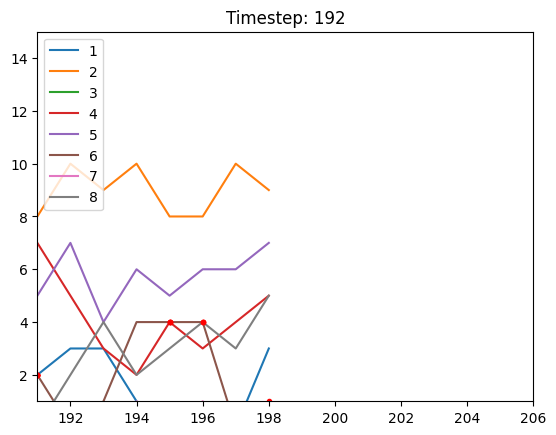

In [116]:
visualize_group_grades(group_dfs, run_number=1, run_length=200, window=8)

In [ ]:
# identify social loafing
